<a href="https://colab.research.google.com/github/irina-marko/Minimal-metric-dimension/blob/main/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import random
from itertools import combinations
from functools import partial
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import time
import re

In [2]:
def precompute_shortest_paths(G):
  return dict(nx.all_pairs_bellman_ford_path_length(G))


In [3]:
def is_resolving_set(G, nodes, shortest_paths):
    for u, v in combinations(G.nodes, 2):
        distances_u = [shortest_paths[u][node] for node in nodes]
        distances_v = [shortest_paths[v][node] for node in nodes]

        if not any(dist_u != dist_v for dist_u, dist_v in zip(distances_u, distances_v)):
            return False
    return True

In [4]:
def fitness(G, nodes, shortest_paths):
    if is_resolving_set(G, nodes, shortest_paths):
        return len(nodes)
    else:
        return float('inf')

In [5]:
def select_two_parents(population, fitness, iteration, max_iterations):

    if iteration < max_iterations // 2:

        return [tournament_selection(population, fitness, k=3) for _ in range(2)]
    else:

        return [roulette_wheel_selection(population, fitness) for _ in range(2)]

def tournament_selection(population, fitness, k):

    selected = random.sample(list(zip(population, fitness)), k)
    winner = max(selected, key=lambda x: x[1])
    return winner[0]

def roulette_wheel_selection(population, fitness):

    finite_population = [individual for individual, fit in zip(population, fitness) if fit != float('inf')]
    finite_fitness = [fit for fit in fitness if fit != float('inf')]

    if not finite_fitness:
        raise ValueError("No finite fitness values found in population")

    total_fitness = sum(finite_fitness)
    probabilities = [f / total_fitness for f in finite_fitness]
    return random.choices(finite_population, probabilities)[0]



In [6]:

def crossover(parent1, parent2):
    method_choice = random.randint(0, 2)

    set1, set2 = set(parent1), set(parent2)

    if method_choice == 0:

        result = list(set1.union(set2))
    elif method_choice == 1:

        result = list(set1.intersection(set2))
    else:

        combined = list(set1.union(set2))
        result = random.sample(combined, random.randint(1, len(combined)))

    return result


In [7]:
def mutate(nodes, nodes_list):

    mutation_choice = random.randint(0, 1)

    if mutation_choice == 0:

        if nodes:
            nodes.remove(random.choice(nodes))
        nodes.append(random.choice(nodes_list))
    else:

        if nodes:
            nodes[random.randint(0, len(nodes) - 1)] = random.choice(nodes_list)

    return nodes

In [8]:
def genetic_algorithm(G, population_size=100, generations=1000, mutation_rate=0.1, selection_strategy='roulette'):
    start_time = time.time()

    nodes_list = list(G.nodes)
    shortest_paths = precompute_shortest_paths(G)
    population = [random.sample(nodes_list, random.randint(1, len(nodes_list))) for _ in range(population_size)]

    best_solution = min(population, key=lambda nodes: fitness(G, nodes, shortest_paths))


    time_limit= 0.02

    for g in range(generations):

        if (time.time() - start_time) > time_limit:
              print(f"Time limit of {time_limit} seconds reached.")
              print("Best result set:", best_solution)
              print("Metric dimension:", len(best_solution))
              break

        fitness_values = [fitness(G, nodes, shortest_paths) for nodes in population]

        parents = select_two_parents(population, fitness_values, g, generations)
        if len(parents) != 2:
            raise ValueError(f"Expected 2 parents, but got {len(parents)}")

        parent1, parent2 = parents
        child = crossover(parent1, parent2)

        if random.random() < mutation_rate:
            child = mutate(child, nodes_list)

        population.append(child)
        population = sorted(population, key=lambda nodes: fitness(G, nodes, shortest_paths))[:population_size]


        current_best = min(population, key=lambda nodes: fitness(G, nodes, shortest_paths))
        if fitness(G, current_best, shortest_paths) < fitness(G, best_solution, shortest_paths):
            best_solution = current_best
    return best_solution


Linijski graf
Testing graph with nodes: [0, 1, 2, 3, 4]


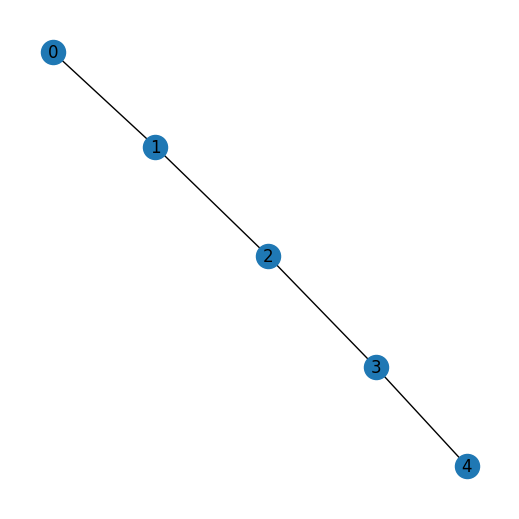


Time limit of 0.02 seconds reached.
Best result set: [4]
Metric dimension: 1
Genetic algorithm execution time: 0.02145 seconds
Best result set: [4]
Metric dimension: 1


Potpuni graf
Testing graph with nodes: [0, 1, 2, 3]


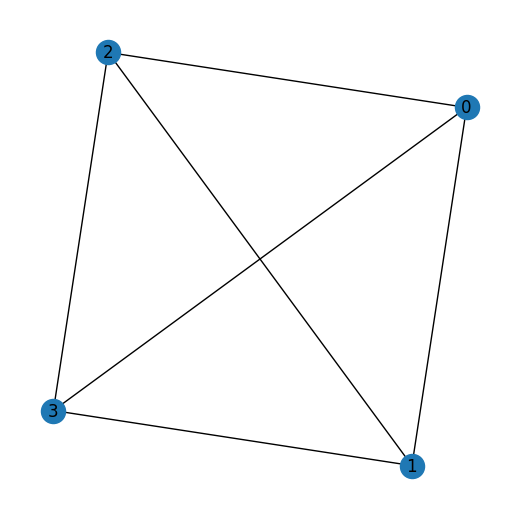


Genetic algorithm execution time: 0.01991 seconds
Best result set: [0, 1, 3]
Metric dimension: 3


Ciklični graf
Testing graph with nodes: [0, 1, 2, 3, 4, 5]


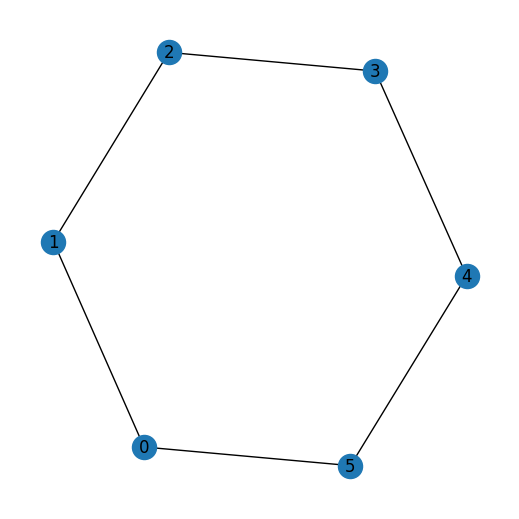


Time limit of 0.02 seconds reached.
Best result set: [4, 3]
Metric dimension: 2
Genetic algorithm execution time: 0.02187 seconds
Best result set: [4, 3]
Metric dimension: 2


Zvezdasti graf
Testing graph with nodes: [0, 1, 2, 3, 4, 5]


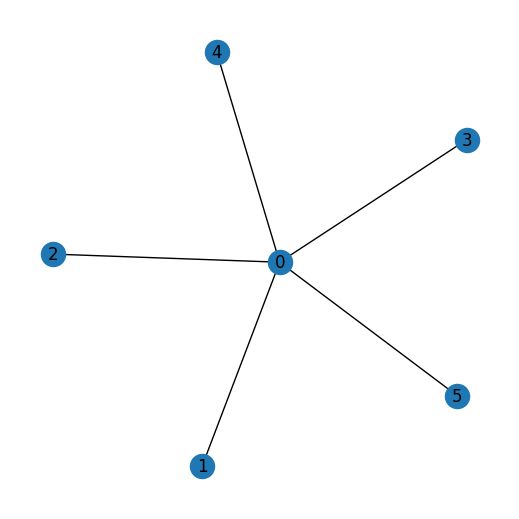


Time limit of 0.02 seconds reached.
Best result set: [4, 5, 1, 2, 3]
Metric dimension: 5
Genetic algorithm execution time: 0.02619 seconds
Best result set: [4, 5, 1, 2, 3]
Metric dimension: 5


Kompletan graf
Testing graph with nodes: [0, 1, 2, 3, 4]


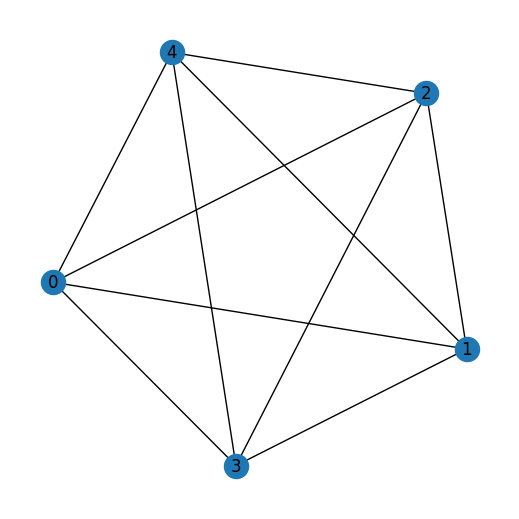


Time limit of 0.02 seconds reached.
Best result set: [4, 0, 2, 1]
Metric dimension: 4
Genetic algorithm execution time: 0.02142 seconds
Best result set: [4, 0, 2, 1]
Metric dimension: 4



In [10]:

def test_genetic_algorithm(G, population_size=5, generations=50, mutation_rate=0.1):
    plt.figure(figsize=(5, 5))
    print("Testing graph with nodes:", G.nodes)
    nx.draw(G, with_labels=True)
    plt.show()
    print()

    # Run genetic algorithm
    start_time = time.time()
    best_landmarks = genetic_algorithm(G, population_size, generations, mutation_rate)
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Display results
    print(f"Genetic algorithm execution time: {elapsed_time:.5f} seconds")
    print("Best result set:", best_landmarks)
    print("Metric dimension:", len(best_landmarks))
    print()

# Test with different graph types
print("\nLinijski graf")
G1 = nx.path_graph(5)
test_genetic_algorithm(G1)

print("\nPotpuni graf")
G2 = nx.complete_graph(4)
test_genetic_algorithm(G2)

print("\nCiklični graf")
G3 = nx.cycle_graph(6)
test_genetic_algorithm(G3)

print("\nZvezdasti graf")
G4 = nx.star_graph(5)
test_genetic_algorithm(G4)

print("\nKompletan graf")
G5 = nx.complete_graph(5)
test_genetic_algorithm(G5)
